In [1]:
from funcs.notebook import *

from lightkurve import search_lightcurvefile
from altaipony.lcio import from_mast
from altaipony.flarelc import FlareLightCurve


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
ff = pd.read_csv("../results/2020_02_flares_vetted.csv")
ff = ff.drop(["real?","note"], axis=1)
f = ff.dropna().drop_duplicates(subset=["ID", "qcs","istart"])
f

NumExpr defaulting to 8 threads.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n
8,8318.0,8323.0,257978.0,257983.0,1585.761463,1585.768408,6.663345,0.543845,0.016775,0.006944,15290,GJ 1132,10,TESS,04_02_2021_12_55_04,5.070231,0
13,61073.0,61085.0,3678347.0,3678359.0,2078.925187,2078.927965,0.754213,0.042297,0.003964,0.002778,89725,GJ 143,28,TESS,05_02_2021_10_30_00,56.600531,0
23,9188.0,9191.0,496458.0,496461.0,1916.985504,1916.989671,0.668132,0.099933,0.002017,0.004167,15881,GJ 436,22,TESS,04_02_2021_13_19_56,6.225650,0
50,17317.0,17328.0,90451.0,90462.0,1353.087227,1353.102504,19.307381,1.226647,0.023652,0.015277,17376,HATS-14,1,TESS,04_02_2021_11_45_42,2.848574,0
80,17559.0,17563.0,170476.0,170480.0,1464.231243,1464.236798,24.828945,3.410916,0.065594,0.005556,17591,HATS-44,5,TESS,04_02_2021_11_50_21,4.947662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,12635.0,12640.0,269511.0,269516.0,300.352341,300.355747,0.900113,0.037943,0.004302,0.003406,42861,Kepler-109,3,Kepler,08_02_2021_10_25_45,11.034313,1
1730,33259.0,33263.0,337785.0,337789.0,346.853046,346.855770,0.603792,0.040338,0.004327,0.002724,37129,Kepler-109,3,Kepler,08_02_2021_10_26_01,7.867276,2
1735,12336.0,12340.0,540395.0,540399.0,484.856740,484.859464,0.481002,0.042013,0.002654,0.002725,39541,Kepler-109,5,Kepler,08_02_2021_10_27_44,10.340565,1
1736,24500.0,24504.0,553045.0,553049.0,493.473309,493.476034,0.750864,0.039844,0.004768,0.002725,39541,Kepler-109,5,Kepler,08_02_2021_10_27_44,10.340565,1


In [3]:
f.shape, ff.dropna().shape

((747, 17), (747, 17))

In [4]:
gf = f[["ID","qcs","mission",'tstamp']].drop_duplicates(subset=["ID","qcs","mission"])

In [5]:
gf.shape

(185, 4)

In [340]:
row = gf.iloc[182]

# plot all flares for a light curve at once
ID, qcs = row.ID, int(row.qcs)
sdf = f[(f.qcs == qcs) & (f.ID == ID) & (f.mission == row.mission)]

lc = from_mast(ID,c=qcs,mission=row.mission,cadence="short",flux_type="PDCSAP_FLUX",
               download_dir="/home/ekaterina/Documents/001_science/lcs")

# make it a list of LCs even if only one LC is returned
if type(lc) == FlareLightCurve:

    lc = [lc]

elif type(lc) == list:

    lc = lc
tts = np.array([(l.time[0], l.time[-1]) for l in lc])
print(row.ID, row.qcs)

3% (1453/44550) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (1453/44550) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (120/44100) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (120/44100) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (149/38160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (149/38160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Kepler-109 3


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/Kepler/kplr005094751_sc_Q000333333333333300/kplr005094751-2009350160919_slc.fits' mode='rb' closefd=True>
  c)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/Kepler/kplr005094751_sc_Q000333333333333300/kplr005094751-2009322144938_slc.fits' mode='rb' closefd=True>
  c)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/Kepler/kplr005094751_sc_Q000333333333333300/kplr005094751-2009291181958_slc.fits' mod

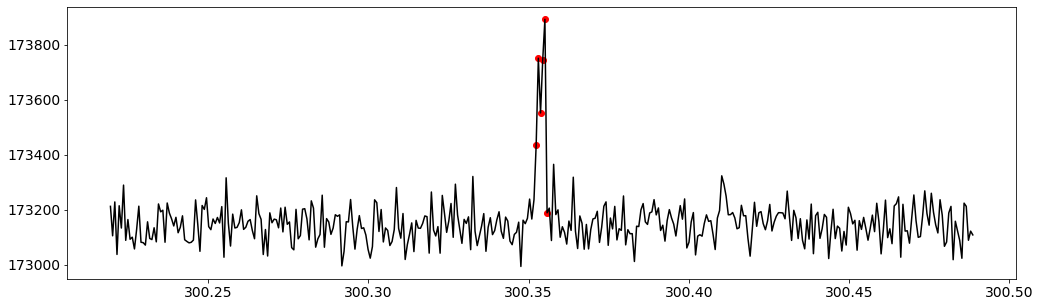

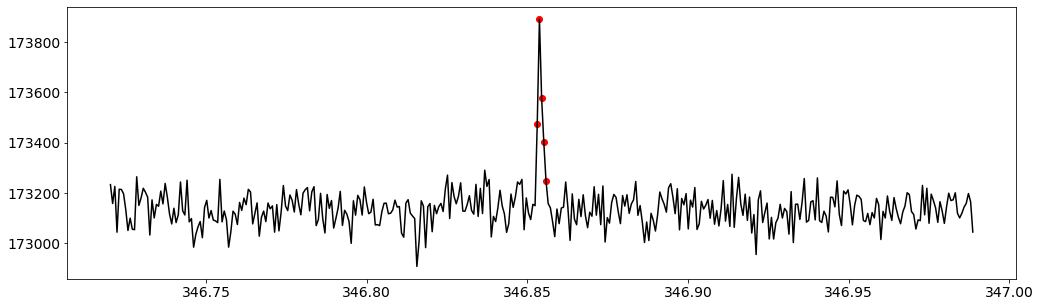

In [341]:
%matplotlib inline
for i, row in sdf.iloc[:].iterrows():
    plt.figure(figsize=(17,5))
    ts, tf = row.tstart, row.tstop
    
    # pick

    if row.mission=="TESS":
        LC = lc[0]
        cad=.2
    else:
        nlc = np.where((ts>tts)[:,0] != (ts>tts)[:,1])[0][0]
        LC = lc[nlc]
        cad=1.5
    _ = LC[np.where((LC.time>=ts-.2/cad) & (LC.time<=tf+.2/cad))]
    plt.plot(_.time, _.flux, c="k")

    _ = LC[np.where((LC.time>=ts-1e-8) & (LC.time<=tf+1e-8))]
    plt.scatter(_.time, _.flux, c="r")
#     plt.ylim(3200,3900)

In [327]:
from lightkurve import search_targetpixelfile

In [328]:
tpf = search_targetpixelfile(ID,quarter=qcs,mission="Kepler").download_all()

6% (274/4754) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (274/4754) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [329]:
tpf

TargetPixelFileCollection of 1 objects:
	10857519 (1 KeplerTargetPixelFiles) Quarters: 11

In [331]:
tpf[0].interact()

INFO:bokeh.server.server:Starting Bokeh server version 2.0.0 (running on Tornado 6.0.4)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


200 GET /autoload.js?bokeh-autoload-element=85444&bokeh-absolute-url=http://localhost:37801&resources=none (127.0.0.1) 269.71ms
101 GET /ws (127.0.0.1) 0.61ms
INFO:bokeh.server.views.ws:WebSocket connection opened
INFO:bokeh.server.views.ws:ServerConnection created


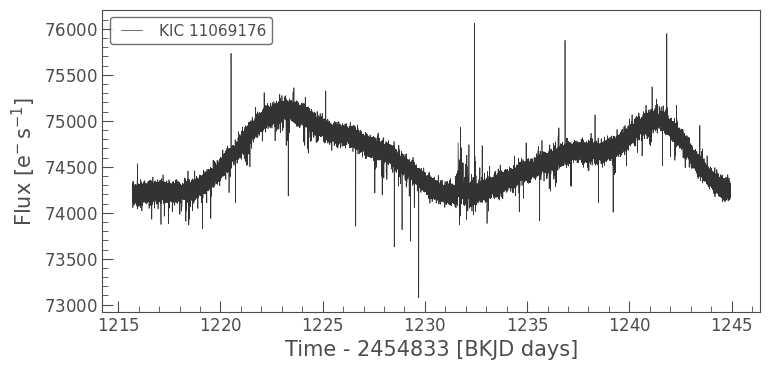

In [300]:
lc[1].plot()
# # plt.scatter(lc[0].time, lc[0].flux)
# plt.xlim(1427, 1432)
# plt.ylim(278000,282000);

In [74]:
0.012941277069331 + 0.004767928403453


0.017709205472783998